In [51]:
import torch
import torch.nn as nn
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as KL
from matplotlib import pyplot as plt


In [52]:
from keras.datasets import mnist

(Xtrain,ytrain),(Xtest,ytest) = mnist.load_data()

# Normalize the Inputs
Xtrain, Xtest = Xtrain/255.0, Xtest/255.0

In [66]:
# Making the layers
inputs = KL.Input(shape=(28, 28))
l = KL.Flatten()(inputs) 
# Dense Layers: https://keras.io/api/layers/core_layers/dense/   
l = KL.Dense(512, activation=tf.nn.relu)(l) # Relu activation function
outputs = KL.Dense(10, activation=tf.nn.softmax)(l) # softmax activation function

model = tf.keras.models.Model(inputs, outputs)
model.summary() 
# For compile/fit args: https://www.tensorflow.org/api_docs/python/tf/keras/Model
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"]) # sparse bc labels as ints
history  = model.fit(Xtrain, ytrain, epochs=10, validation_data=(Xtest, ytest))

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 dense_17 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.2013 - accuracy: 0.9416 - val_loss: 0.1006 - val_accuracy: 0.9674
Epoch 2/10
1875/1875 [==================

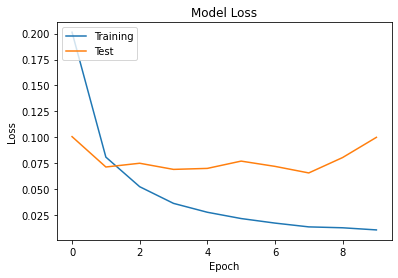

In [67]:
#  For history and plotting https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Test'], loc='upper left')
plt.show()

